***By: Jacob Curry and Gabriel Rodriguez***

**Setup:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import copy
from copy import deepcopy

import random
random.seed(17)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSC 466 Final Project/final_df.csv')

**Pre-Processing:**

In [ ]:
# Start of new df
###### DO NOT RUN THIS BLOCK OF CODE MORE THAN ONCE PER ENVIRONMENT!!!!!!

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] 
counter = 1
for i,j in enumerate(df["Year"]):  #index, value
  if counter == 1:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 2:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 3:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 4:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 5:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 6:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 7:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 8:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 9:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 10:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 11:
    df["Year"][i] = str(j) + months[counter-1]
    counter +=1
  elif counter == 12:
    df["Year"][i] = str(j) + months[counter-1]
    counter = 1


<ipython-input-4-46ae5ed33bec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"][i] = str(j) + months[counter-1]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Reformatting Index

dfs = df.set_index("Year")
fin_df = dfs.drop("Month", axis = 1)
fin_df

,EffectiveFederalFundsRate,RealGDP,UnemploymentRate,InflationRate,CorePCE
Year,,,,,
1973Jan,5.94,10.2,4.9,2.80,2.6800
1973Feb,6.58,10.2,5.0,2.80,2.7300
1973Mar,7.09,10.2,4.9,3.00,2.9400
1973Apr,7.12,4.6,5.0,3.20,3.2900
1973May,7.84,4.6,4.9,3.20,3.4500
...,...,...,...,...,...
2022Jun,1.58,-0.6,3.6,9.06,0.0488
2022Jul,2.32,2.6,3.5,8.52,0.0504
2022Aug,2.33,2.6,3.7,8.26,0.0467


In [ ]:
# Fixing the "CorePCE" values
###### DO NOT RUN THIS BLOCK OF CODE MORE THAN ONCE PER ENVIRONMENT!!!!!!

for i,j in enumerate(fin_df["CorePCE"]): #index, value 
  if j > 1:
    continue 
  elif j< 1:
    fin_df["CorePCE"][i] = j * 100 
    

In [ ]:
# Note that the Target variable is "EffectiveFederalFundsRate"
fin_df

,EffectiveFederalFundsRate,RealGDP,UnemploymentRate,InflationRate,CorePCE
Year,,,,,
1973Jan,5.94,10.2,4.9,2.80,2.68
1973Feb,6.58,10.2,5.0,2.80,2.73
1973Mar,7.09,10.2,4.9,3.00,2.94
1973Apr,7.12,4.6,5.0,3.20,3.29
1973May,7.84,4.6,4.9,3.20,3.45
...,...,...,...,...,...
2022Jun,1.58,-0.6,3.6,9.06,4.88
2022Jul,2.32,2.6,3.5,8.52,5.04
2022Aug,2.33,2.6,3.7,8.26,4.67


In [ ]:
fin_df.head()

,EffectiveFederalFundsRate,RealGDP,UnemploymentRate,InflationRate,CorePCE
Year,,,,,
1973Jan,5.94,10.2,4.9,2.8,2.68
1973Feb,6.58,10.2,5.0,2.8,2.73
1973Mar,7.09,10.2,4.9,3.0,2.94
1973Apr,7.12,4.6,5.0,3.2,3.29
1973May,7.84,4.6,4.9,3.2,3.45


**Turning Response Variable Into a Categorical Variable**

In [ ]:
# Printing Five-Number Summary
five_num_sum = []
for q in [0, 0.25, 0.5, 0.75, 1]:
  five_num_sum.append(np.quantile(df["EffectiveFederalFundsRate"], q = q))
print(five_num_sum)

[0.05, 1.225, 4.99, 7.1125, 19.1]


In [ ]:
# Creating new categories based on the five number summary
groups = []
for r in df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum):
    if mn == five_num_sum[-1]:
      break
    mx = five_num_sum[i+1]
    if mx == five_num_sum[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups.append(cur_group)
      break
print(groups[:5])

['[4.99, 7.1125)', '[4.99, 7.1125)', '[4.99, 7.1125)', '[7.1125, 19.1]', '[7.1125, 19.1]']


In [ ]:
# Adding groups to fin_df
fin_df["EFFR_Group"] = groups

In [ ]:
# Exploring Value Counts
counts = fin_df["EFFR_Group"].value_counts()
print(counts)
for i in counts.index:
  if counts.loc[i] < 10:
    print(i)
    print(counts.loc[i])
    print()

[4.99, 7.1125)    150
[7.1125, 19.1]    150
[0.05, 1.225)     150
[1.225, 4.99)     148
Name: EFFR_Group, dtype: int64


**Training-Testing Splits**

In [ ]:
# Splitting the Data into Training and Testing Sets
def train_test_splits(X,y,test_frac=0.5):
    # Randomly splits dataset into training and testing data. Unmodified from Lab 2.
    inxs = list(range(len(y)))
    np.random.shuffle(inxs)
    X = X.iloc[inxs,:]
    y = y.iloc[inxs]
    Xtrain,ytrain,Xtest,ytest = None,None,None,None
    
    cutoff = len(y)*(1-test_frac)
    if cutoff % 1 == 0:
        cutoff = int(cutoff)
    elif cutoff % 1 <= 0.5:
        cutoff = int(cutoff) + 1
    elif cutoff % 1 > 0.5:
        cutoff = int(cutoff) - 1
        
    train_list = list(range(cutoff))
    test_list = list(range(cutoff, len(y)))
    
    Xtrain,ytrain,Xtest,ytest = X.iloc[train_list,:], y.iloc[train_list], X.iloc[test_list,:], y.iloc[test_list]
    return Xtrain,ytrain,Xtest,ytest

**Lab 3 Evaluation Functions**

In [ ]:
def lab_conf_matrix(t,y,labels):
    cm = pd.DataFrame(columns=labels,index=labels)
    # actual is on the rows, pred on the columns
    for truth in labels:
        for pred in labels:
            count = sum((t == truth) & (y == pred))
            cm.loc[truth, pred] = count
    return cm

def evaluation(cm,positive_class=1):
    stats = {}
    stats["accuracy"] = None
    stats["sensitivity/recall"] = None
    stats["specificity"] = None
    stats["precision"] = None
    stats["F1"] = None
    num_correct = 0
    num_tns = 0
    num_fps = 0
    for row in list(cm.index):
        for col in list(cm.columns):
            if row == col:
                num_correct += cm.loc[row, col]
                # TPR or TNR
                try:
                    val = cm.loc[row, col]/sum(cm.loc[row])
                except ZeroDivisionError:
                    val = None
                if row == positive_class:
                    # TPR
                    stats["sensitivity/recall"] = val
                    # Precision
                    try:
                        val = cm.loc[row, col]/sum(cm[col])
                    except ZeroDivisionError:
                        val = None
                    stats["precision"] = val
                else:
                    # TNR
                    num_tns += cm.loc[row, col]
            elif col == positive_class and row != positive_class:
                num_fps += cm.loc[row, col]
    stats["specificity"] = num_tns/(num_tns+num_fps)
    stats["accuracy"] = num_correct/cm.sum().sum()
    try:
        stats["F1"] = 2*stats["precision"]*stats["sensitivity/recall"] / (stats["precision"]+stats["sensitivity/recall"])
    except TypeError:
        stats["F1"] = None
    return stats

***QUESTION 1: Can our models predict future Federal Reserve interest rate decisions just based on economic and market data? How dependent is the Federal Reserve on economic data really?***

**Algorithm 1 (Decision Tree)**

Getting Training and Testing Data

In [ ]:
# Getting features and target
X = fin_df.drop(["EffectiveFederalFundsRate", "EFFR_Group"], axis=1)
y = fin_df["EFFR_Group"]

# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X, y, 0.25)

Scikit-Learn Implementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
# Tuning
  # (Heavily inspired by the notebook showcased in the following YouTube video): https://www.youtube.com/watch?v=Q9eDnBsAJ4w&t=600s

param_grid = {"max_depth": [8, 9, 10, 11, 12], 
              "ccp_alpha": [0.001, 0.0025, 0.005, 0.0075, 0.009]}

tree = DecisionTreeClassifier(criterion = "entropy", random_state = 17, min_impurity_decrease=0.000001)

gs = GridSearchCV(tree, param_grid, cv=10, scoring="accuracy")
gs.fit(X_train, y_train)

print("Best Score: ", gs.best_score_)
print("Best Parameters: ", gs.best_params_)

Best Score:  0.8262121212121212
Best Parameters:  {'ccp_alpha': 0.005, 'max_depth': 10}


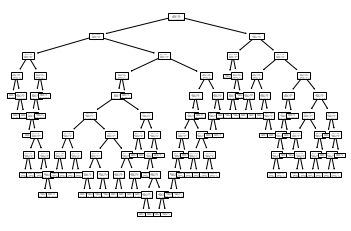

In [ ]:
# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

In [ ]:
# Testing
preds = tree.predict(X_test)
preds = preds.tolist()
truths = y_test.to_list()

# Evaluation
print(confusion_matrix(truths, preds))

[[31  2  0  0]
 [ 3 30  8  0]
 [ 0  5 35  3]
 [ 0  0  2 30]]


In [ ]:
# Accuracy
print(accuracy_score(truths, preds))

0.8456375838926175


Lab Implementation

In [ ]:
# Lab 4 Functions

def entropy(y):
    e = None
    # YOUR SOLUTION HERE
    e = 0
    value_counts = y.value_counts()
    denom = value_counts.sum()
    for i in value_counts.index:
        numer = value_counts.loc[i]
        frac = numer/denom
        e += -frac * np.log2(frac)
    return e

def gain(y,x):
    g = 0
    # YOUR SOLUTION HERE
    denom = len(y)
    value_counts_x = x.value_counts()
    for i in value_counts_x.index:
        subset = y[x == i]
        numer = len(subset)
        g += numer/denom * entropy(subset)
    return entropy(y) - g

def gain_ratio(y,x):
    # YOUR SOLUTION HERE
    g = gain(y, x)
    return g/entropy(y)

def generate_rules(tree):
    rules = []
    # Your solution here
    if type(tree) is not dict:
        return [tree]
   
    for key in tree.keys():
        for val in tree[key].keys():
            sub_rules = generate_rules(tree[key][val])
            for cur_rule in sub_rules:
                if type(cur_rule) == str:
                    final_rule = [cur_rule]
                else:
                    final_rule = cur_rule
                #try:
                final_rule.insert(0, (key, val))
                #except:
                  #import pdb
                  #pdb.set_trace()
                rules.append(final_rule)

    return rules

def split_col(x, y):
    x2 = list(x.copy())
    save_x = x.copy()
    x2.sort()
    splits = []
    gr = None
    c = None
    for i in range(0, len(x2)-1):
        splits.append((x2[i] + x2[i+1]) / 2)
    for split in splits:
        x = x.apply(lambda x: True if x < split else False)
        cur_gr = gain_ratio(y, x)
        if gr is None or gr < cur_gr:
            gr = cur_gr
            c = round(split, 2)
        x = save_x.copy()
    return gr, c

def select_split2(X, y):
    newname, gr = None, None
    # Your solution here
    # Iterates through all columns to find the best one to split on
    for cur_col in X.columns:
        # Note that split_col() function was already mostly written by the professor
        cur_gr, split_val = split_col(X[cur_col], y)
        if gr == None or gr < cur_gr:
            # Builds the new column name, adding a '0' to achieve the proper number of decimal places
            newname = cur_col + '<' + str(split_val) + '0'
            gr = cur_gr
    return newname, gr

def make_tree2(X,y,min_split_count=5):
    tree = {}
    # Your solution here
    X_copy = X.copy()
    if X_copy.shape[1] == 0:
        return y.value_counts().index[0]
    if X_copy.shape[0] < min_split_count:
        return y.value_counts().index[0]
    if len(y.value_counts()) == 1:
        return y.iloc[0]
    new_col, gr = select_split2(X_copy, y)
    col = new_col.split('<')[0]
    val = new_col.split('<')[1]
    X_copy[new_col] = X_copy[col] < float(val)
    X_copy.drop(col, axis=1, inplace=True)
    if gr >= 0.001:
        tree[new_col] = {}              
        for val in X_copy[new_col].value_counts().index.sort_values():
            new_X = X_copy[X_copy[new_col] == val]
            new_X = new_X.drop(new_col, axis = 1)
            new_y = y[X_copy[new_col] == val]
            tree[new_col][str(val)] = make_tree2(new_X, new_y, min_split_count)
    else:
        return y.value_counts().index[0]
    return tree

def make_prediction(rules,x,default):
    # Your solution here
    for rule in rules:
        match = True
        for i, feat_val in enumerate(rule):
            if i == len(rule)-1:
                break
            try:
                if x[feat_val[0]] != feat_val[1]:
                    match = False
                    break
            except KeyError:
                key = feat_val[0].split('<')
                feat = key[0]
                val = key[1]
                if feat_val[1] == "False" and x[feat] < float(val):
                    match = False
                    break
                if feat_val[1] == "True" and x[feat] >= float(val):
                    match = False
                    break
        if match:
            return rule[-1]
    return(default)

In [ ]:
# Training
tree = make_tree2(X_train, y_train, min_split_count=1)
rules = generate_rules(tree)

In [ ]:
# Testing
default = None
preds = X_test.apply(lambda x: make_prediction(rules, x, default), axis=1)

In [ ]:
# Evaluation
truths = y_test
labels = list(pd.Series(pd.Series(groups).unique()).sort_values())
cm = lab_conf_matrix(truths, preds, labels)
cm

,"[0.05, 1.225)","[1.225, 4.99)","[4.99, 7.1125)","[7.1125, 19.1]"
"[0.05, 1.225)",28,4,0,1
"[1.225, 4.99)",7,29,0,5
"[4.99, 7.1125)",0,25,0,18
"[7.1125, 19.1]",0,0,0,32


In [ ]:
# Accuracy
print(accuracy_score(truths, preds))

0.5973154362416108


In [ ]:
# Performance Metrics
for r in labels:
  print("Performance with respect to EFFRs in the range " + r)
  print(evaluation(cm, positive_class=r))
  print()

Performance with respect to EFFRs in the range [0.05, 1.225)
{'accuracy': 0.5973154362416108, 'sensitivity/recall': 0.8484848484848485, 'specificity': 0.8970588235294118, 'precision': 0.8, 'F1': 0.823529411764706}

Performance with respect to EFFRs in the range [1.225, 4.99)
{'accuracy': 0.5973154362416108, 'sensitivity/recall': 0.7073170731707317, 'specificity': 0.6741573033707865, 'precision': 0.5, 'F1': 0.5858585858585859}

Performance with respect to EFFRs in the range [4.99, 7.1125)
{'accuracy': 0.5973154362416108, 'sensitivity/recall': 0.0, 'specificity': 1.0, 'precision': None, 'F1': None}

Performance with respect to EFFRs in the range [7.1125, 19.1]
{'accuracy': 0.5973154362416108, 'sensitivity/recall': 1.0, 'specificity': 0.7037037037037037, 'precision': 0.5714285714285714, 'F1': 0.7272727272727273}



**Algorithm 2: Neural Network**

In [ ]:
# Lab 3 Functions

def activation(net):
    return 1/(1+np.exp(-net))

def train(X,t,nepochs=1000,n=0.5,test_size=0.15,val_size=0.15,seed=0):
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=test_size,random_state=seed)
    X_train2, X_val, t_train2, t_val = train_test_split(X_train, t_train, test_size=val_size,random_state=seed)

    train_accuracy = []
    val_accuracy = []
    nfeatures = X.shape[1]
    np.random.seed(seed)
    w = 2*np.random.uniform(size=(nfeatures,)) - 1

    for epoch in range(nepochs):
        y_train2 = X_train2.apply(lambda x: activation(np.dot(w,x)),axis=1)
        y_val = X_val.apply(lambda x: activation(np.dot(w,x)),axis=1)

        train_accuracy.append(sum(t_train2 == np.round(y_train2))/len(t_train2))
        val_accuracy.append(sum(t_val == np.round(y_val))/len(t_val))
                
        for j in range(len(w)):
            # CAUSES ERROR SINCE RESPONSE VARIABLE HAS TEXT CATEGORIES
            w[j] -= n*np.dot((y_train2 - t_train2)*y_train2*(1-y_train2),X_train2.iloc[:,j])

    results = pd.DataFrame({"epoch": np.arange(nepochs)+1, 'train_accuracy':train_accuracy,'val_accuracy':val_accuracy,
                            "n":n,'test_size':test_size,'val_size':val_size,'seed':seed
                           }).set_index(['n','test_size','val_size','seed'])
    return w,X_test,t_test,results

def predict(w,X,threshold=0.5):
    y = None
    y = []
    nets = X.apply(lambda x: activation(sum(w*np.array(x.values))), axis=1)
    for i in list(nets.index):
        if nets[i] > threshold:
            nets[i] = 1
        else:
            nets[i] = 0
    return nets.astype('int64')

Getting X and Y

In [ ]:
# Getting features and target
X = fin_df.drop(["EffectiveFederalFundsRate", "EFFR_Group"], axis=1)
y = fin_df["EFFR_Group"]

Scaling the Data

In [ ]:
# Standard Scaling (from Lab 3's given code)
means = X.mean()
sds = X.std()
X2 = X.apply(lambda x: (x-means)/sds, axis=1)
X2

,RealGDP,UnemploymentRate,InflationRate,CorePCE
Year,,,,
1973Jan,1.646526,-0.769641,-0.421826,-0.298428
1973Feb,1.646526,-0.711441,-0.421826,-0.276307
1973March,1.646526,-0.769641,-0.348386,-0.183401
1973April,0.415336,-0.711441,-0.274946,-0.028557
1973May,0.415336,-0.769641,-0.274946,0.042229
...,...,...,...,...
2022June,-0.727913,-1.526240,1.876849,0.674877
2022July,-0.024375,-1.584440,1.678560,0.745663
2022Aug,-0.024375,-1.468040,1.583088,0.581971


***Categorical Response Variable***

Scikit-Learn Implementation

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X2, y, 0.25)

In [ ]:
# Tuning
  # (Heavily inspired by the notebook showcased in the following YouTube video): https://www.youtube.com/watch?v=Q9eDnBsAJ4w&t=600s

param_grid = {#"activation": ['identity', 'logistic', 'tanh', 'relu'], 
              #"solver": ['lbfgs', 'sgd', 'adam'], 
              #"learning_rate": ["constant", "invscaling", "adaptive"], 
              #"momentum": [0.1, 0.5, 0.9], 
              "learning_rate_init": [0.000001, 0.0001, 0.01]}

network = MLPClassifier(activation = 'logistic', solver = 'lbfgs', max_iter = 1000, random_state = 17, early_stopping = True)

gs = GridSearchCV(network, param_grid, cv=10, scoring="accuracy")
gs.fit(X_train.values, y_train.values)

print("Best Score: ", gs.best_score_)
print("Best Parameters: ", gs.best_params_)

Best Score:  0.8730808080808081
Best Parameters:  {'learning_rate_init': 1e-06}


In [ ]:
# Training
network = MLPClassifier(activation = 'logistic', solver = 'lbfgs', max_iter = 1000, random_state = 17).fit(X_train, y_train)

In [ ]:
# Testing
preds = network.predict(X_test)
preds = preds.tolist()
truths = y_test.to_list()

print(confusion_matrix(truths, preds))

[[33  0  0  0]
 [ 2 32  7  0]
 [ 1  5 34  3]
 [ 0  1  2 29]]


In [ ]:
# Accuracy Score
print(accuracy_score(truths, preds))

0.8590604026845637


In [ ]:
# Evaluation
truths = y_test
preds = network.predict(X_test)
labels = list(pd.Series(pd.Series(groups).unique()).sort_values())
cm = lab_conf_matrix(truths, preds, labels)
print(cm)

               [0.05, 1.225) [1.225, 4.99) [4.99, 7.1125) [7.1125, 19.1]
[0.05, 1.225)             33             0              0              0
[1.225, 4.99)              2            32              7              0
[4.99, 7.1125)             1             5             34              3
[7.1125, 19.1]             0             1              2             29


In [ ]:
# Performance
for r in labels:
  print("Performance with respect to EFFRs in the range " + r)
  print(evaluation(cm, positive_class=r))
  print()

Performance with respect to EFFRs in the range [0.05, 1.225)
{'accuracy': 0.8590604026845637, 'sensitivity/recall': 1.0, 'specificity': 0.9693877551020408, 'precision': 0.9166666666666666, 'F1': 0.9565217391304348}

Performance with respect to EFFRs in the range [1.225, 4.99)
{'accuracy': 0.8590604026845637, 'sensitivity/recall': 0.7804878048780488, 'specificity': 0.9411764705882353, 'precision': 0.8421052631578947, 'F1': 0.810126582278481}

Performance with respect to EFFRs in the range [4.99, 7.1125)
{'accuracy': 0.8590604026845637, 'sensitivity/recall': 0.7906976744186046, 'specificity': 0.912621359223301, 'precision': 0.7906976744186046, 'F1': 0.7906976744186046}

Performance with respect to EFFRs in the range [7.1125, 19.1]
{'accuracy': 0.8590604026845637, 'sensitivity/recall': 0.90625, 'specificity': 0.9705882352941176, 'precision': 0.90625, 'F1': 0.90625}



Lab 3 Implementation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Converting response variable in numeric categories
labels = list(pd.Series(pd.Series(groups).unique()).sort_values())

class_to_id = {}
for i, group in enumerate(labels):
  class_to_id[group] = i

lab_y = y.copy()
for i, group in enumerate(y):
  lab_y.iloc[i] = class_to_id[group]

print(y.head())
print(lab_y.head())

Year
1973Jan      [4.99, 7.1125)
1973Feb      [4.99, 7.1125)
1973March    [4.99, 7.1125)
1973April    [7.1125, 19.1]
1973May      [7.1125, 19.1]
Name: EFFR_Group, dtype: object
Year
1973Jan      2
1973Feb      2
1973March    2
1973April    3
1973May      3
Name: EFFR_Group, dtype: object


In [ ]:
# Training
w, lab_X_test, lab_y_test, results = train(X2, lab_y, nepochs = 1000, test_size = 0.15, val_size = 0.15, seed=17)

In [ ]:
# Testing
preds = predict(w, lab_X_test)
labels = list(pd.Series(lab_y.unique()).sort_values())
cm = lab_conf_matrix(lab_y_test, preds, labels)
print(cm)

    0   1  2  3
0  20   3  0  0
1  23   2  0  0
2  10   9  0  0
3   1  22  0  0


In [ ]:
# Evaluation
for r in labels:
  print("Performance with respect to EFFRs in the range " + str(r))
  print(evaluation(cm, positive_class=r))
  print()

Performance with respect to EFFRs in the range 0
{'accuracy': 0.24444444444444444, 'sensitivity/recall': 0.8695652173913043, 'specificity': 0.05555555555555555, 'precision': 0.37037037037037035, 'F1': 0.5194805194805194}

Performance with respect to EFFRs in the range 1
{'accuracy': 0.24444444444444444, 'sensitivity/recall': 0.08, 'specificity': 0.37037037037037035, 'precision': 0.05555555555555555, 'F1': 0.06557377049180328}

Performance with respect to EFFRs in the range 2
{'accuracy': 0.24444444444444444, 'sensitivity/recall': 0.0, 'specificity': 1.0, 'precision': None, 'F1': None}

Performance with respect to EFFRs in the range 3
{'accuracy': 0.24444444444444444, 'sensitivity/recall': 0.0, 'specificity': 1.0, 'precision': None, 'F1': None}



**ANSWER TO QUESTION #1: Can our models predict future Federal Reserve interest rate decisions just based on
economic and market data? How dependent is the Federal Reserve on economic data
really?**

Our models seem to do a great job of predicting interest rate decisions just based on economic and market data. Both our scikit-learn decision tree and scikit-learn neural network achieve roughly 85% testing accuracy when classifying month-year combinations as having interest rate within specific ranges of percents. 

While the corresponding lab-based decision tree performs worse than its scikit-learn counterpart, it still achieves almost 60% accuracy (being much better than a random guess, which would yield roughly 25% accuracy). Our lab-based neural network is slightly worse than a random guess, but this is understandable given its primitive nature (having only one neuron and one layer).

At the very least, economic data seems to be heavily associated with federal reserve interest rate decisions.

***Question #2: Do different time periods (e.g., the "stagflation" era, 2008 recession, and post-Covid) have
different relationships between the features and federal interest rates?***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

In [ ]:
# Feature Importance Function (Slightly-Modified from Lab 2)

def feat_importance(tree, Xtrain, Xtest, ytest, orig_preds, npermutations = 1000):
    # initialize what we are going to return
    importances = {}
    for col in Xtrain.columns:
        importances[col] = 0
    # find the original accuracy
    orig_accuracy = accuracy_score(ytest, orig_preds)
    # now carray out the feature importance work
    for col in Xtrain.columns:
        for perm in range(npermutations):
            Xtest2 = Xtest.copy()
            Xtest2[col] = Xtest[col].sample(frac=1, replace=False).values
            preds = tree.predict(Xtest2)
            perm_accuracy = accuracy_score(ytest, preds)
            importances[col] += orig_accuracy - perm_accuracy
        importances[col] = importances[col]/npermutations
    return importances

(For reference, here are the feature importances for the full dataset):

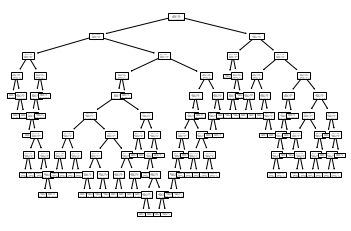

               [0.05, 1.225) [1.225, 4.99) [4.99, 7.1125) [7.1125, 19.1]
[0.05, 1.225)             31             2              0              0
[1.225, 4.99)              3            30              8              0
[4.99, 7.1125)             0             5             35              3
[7.1125, 19.1]             0             0              2             30
Accuracy Score: 0.8456375838926175


In [ ]:
# Getting features and target for each data frame
X = fin_df.drop(["EffectiveFederalFundsRate", "EFFR_Group"], axis=1)
y = fin_df["EFFR_Group"]

# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X, y, test_frac = 0.25)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test

# Evaluation
labels = list(pd.Series(pd.Series(groups).unique()).sort_values())
print(lab_conf_matrix(truths, preds, labels))

# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.0781073825503355, 'UnemploymentRate': 0.2917114093959736, 'InflationRate': 0.2860134228187926, 'CorePCE': 0.4638590604026832}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [0.07957047 0.2916443  0.28557718 0.46316107]
Standard Deviation of Feature Importance: [0.02233323 0.03149502 0.02841345 0.03569364]


This question can be explored by using feature importance and data subsetting. First, we must divide the data into smaller datasets (each corresponding to a notable time period).

In [ ]:
# Assigning each data point to a time period
time_df = deepcopy(fin_df)

time_periods = ["Stagflation", "Reagan/Bush", "Clinton", "War on Terror", "Recession", "Trump", "Covid/Post-Covid"]
data_time_periods = []

for i in fin_df.index:
  year = int(i[:4])
  if year <= 1982:
    data_time_periods.append(time_periods[0])
  elif year <= 1992:
    data_time_periods.append(time_periods[1])
  elif year <= 2000:
    data_time_periods.append(time_periods[2])
  elif year <= 2007:
    data_time_periods.append(time_periods[3])
  elif year <= 2015:
    data_time_periods.append(time_periods[4])
  elif year <= 2019:
    data_time_periods.append(time_periods[5])
  else:
    data_time_periods.append(time_periods[6])

time_df["TimePeriod"] = data_time_periods

In [ ]:
# Subsetting the data
stag_df = time_df[time_df["TimePeriod"] == time_periods[0]]
reagan_df = time_df[time_df["TimePeriod"] == time_periods[1]]
clint_df = time_df[time_df["TimePeriod"] == time_periods[2]]
terror_df = time_df[time_df["TimePeriod"] == time_periods[3]]
recess_df = time_df[time_df["TimePeriod"] == time_periods[4]]
trump_df = time_df[time_df["TimePeriod"] == time_periods[5]]
covid_df = time_df[time_df["TimePeriod"] == time_periods[6]]

Now, we will prepare the response variable for each subset. This will be categories corresponding to intervals dictated by the five-number summary.

In [ ]:
# Creating all subset intervals
five_num_sum_stag = []
five_num_sum_reagan = []
five_num_sum_clint = []
five_num_sum_terror = []
five_num_sum_recess = []
five_num_sum_trump = []
five_num_sum_covid = []
for q in [0, 0.25, 0.5, 0.75, 1]:
  five_num_sum_stag.append(np.quantile(stag_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_reagan.append(np.quantile(reagan_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_clint.append(np.quantile(clint_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_terror.append(np.quantile(terror_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_recess.append(np.quantile(recess_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_trump.append(np.quantile(trump_df["EffectiveFederalFundsRate"], q = q))
  five_num_sum_covid.append(np.quantile(covid_df["EffectiveFederalFundsRate"], q = q))
print(five_num_sum_stag)
print(five_num_sum_reagan)
print(five_num_sum_clint)
print(five_num_sum_terror)
print(five_num_sum_recess)
print(five_num_sum_trump)
print(five_num_sum_covid)

[4.61, 6.14, 9.54, 12.1, 19.1]
[2.92, 6.415, 7.945, 8.7625, 11.64]
[2.96, 4.74, 5.31, 5.56, 6.54]
[0.98, 1.4075, 2.71, 4.7925, 5.98]
[0.07, 0.09, 0.14, 0.18, 3.94]
[0.34, 0.6225, 1.335, 1.9649999999999999, 2.45]
[0.05, 0.07, 0.08, 0.33, 3.08]


In [ ]:
# Creating new categories based on the five number summary

groups_stag = []
for r in stag_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_stag):
    if mn == five_num_sum_stag[-1]:
      break
    mx = five_num_sum_stag[i+1]
    if mx == five_num_sum_stag[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_stag.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_stag.append(cur_group)
      break
print(groups_stag[:5])

stag_df["New_EFFR_Group"] = groups_stag

['[4.61, 6.14)', '[6.14, 9.54)', '[6.14, 9.54)', '[6.14, 9.54)', '[6.14, 9.54)']


<ipython-input-95-41f0a427a531>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stag_df["New_EFFR_Group"] = groups_stag


In [ ]:
groups_reagan = []
for r in reagan_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_reagan):
    if mn == five_num_sum_reagan[-1]:
      break
    mx = five_num_sum_reagan[i+1]
    if mx == five_num_sum_reagan[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_reagan.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_reagan.append(cur_group)
      break
print(groups_reagan[:5])

reagan_df["New_EFFR_Group"] = groups_reagan

['[7.945, 8.7625)', '[7.945, 8.7625)', '[8.7625, 11.64]', '[8.7625, 11.64]', '[7.945, 8.7625)']


<ipython-input-96-89c74d589d2d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reagan_df["New_EFFR_Group"] = groups_reagan


In [ ]:
groups_clint = []
for r in clint_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_clint):
    if mn == five_num_sum_clint[-1]:
      break
    mx = five_num_sum_clint[i+1]
    if mx == five_num_sum_clint[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_clint.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_clint.append(cur_group)
      break
print(groups_clint[:5])

clint_df["New_EFFR_Group"] = groups_clint

['[2.96, 4.74)', '[2.96, 4.74)', '[2.96, 4.74)', '[2.96, 4.74)', '[2.96, 4.74)']


<ipython-input-97-93d3c29b2db9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clint_df["New_EFFR_Group"] = groups_clint


In [ ]:
groups_terror = []
for r in terror_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_terror):
    if mn == five_num_sum_terror[-1]:
      break
    mx = five_num_sum_terror[i+1]
    if mx == five_num_sum_terror[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_terror.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_terror.append(cur_group)
      break
print(groups_terror[:5])

terror_df["New_EFFR_Group"] = groups_terror

['[4.7925, 5.98]', '[4.7925, 5.98]', '[4.7925, 5.98]', '[4.7925, 5.98]', '[2.71, 4.7925)']


<ipython-input-98-690c8fc76078>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_df["New_EFFR_Group"] = groups_terror


In [ ]:
groups_recess = []
for r in recess_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_recess):
    if mn == five_num_sum_recess[-1]:
      break
    mx = five_num_sum_recess[i+1]
    if mx == five_num_sum_recess[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_recess.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_recess.append(cur_group)
      break
print(groups_recess[:5])

recess_df["New_EFFR_Group"] = groups_recess

['[0.18, 3.94]', '[0.18, 3.94]', '[0.18, 3.94]', '[0.18, 3.94]', '[0.18, 3.94]']


<ipython-input-99-cf8109ad8cde>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recess_df["New_EFFR_Group"] = groups_recess


In [ ]:
groups_trump = []
for r in trump_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_trump):
    if mn == five_num_sum_trump[-1]:
      break
    mx = five_num_sum_trump[i+1]
    if mx == five_num_sum_trump[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_trump.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_trump.append(cur_group)
      break
print(groups_trump[:5])

trump_df["New_EFFR_Group"] = groups_trump

['[0.34, 0.6225)', '[0.34, 0.6225)', '[0.34, 0.6225)', '[0.34, 0.6225)', '[0.34, 0.6225)']


<ipython-input-100-f35d6fbbb2a9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_df["New_EFFR_Group"] = groups_trump


In [ ]:
groups_covid = []
for r in covid_df["EffectiveFederalFundsRate"]:
  for i, mn in enumerate(five_num_sum_covid):
    if mn == five_num_sum_covid[-1]:
      break
    mx = five_num_sum_covid[i+1]
    if mx == five_num_sum_covid[-1]:
      if r >= mn and r <= mx:
        cur_group = '[' + str(mn) + ', ' + str(mx) + ']'
        groups_covid.append(cur_group)
        break
    elif r >= mn and r < mx:
      cur_group = '[' + str(mn) + ', ' + str(mx) + ')'
      groups_covid.append(cur_group)
      break
print(groups_covid[:5])

covid_df["New_EFFR_Group"] = groups_covid

['[0.33, 3.08]', '[0.33, 3.08]', '[0.08, 0.33)', '[0.05, 0.07)', '[0.05, 0.07)']


<ipython-input-101-b85a866f0970>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["New_EFFR_Group"] = groups_covid


Now we will train, test, and evaluate each model using the scikit-learn decision tree. While the scikit-learn neural network technically performs slightly better on our data, the explainability of the scikit-learn decision tree may help us better compare time periods to one another in terms of feature importance.

In [ ]:
# Getting features and target for each data frame

X_stag = stag_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_stag = stag_df["New_EFFR_Group"]

X_reagan = reagan_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_reagan = reagan_df["New_EFFR_Group"]

X_clint = clint_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_clint = clint_df["New_EFFR_Group"]

X_terror = terror_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_terror = terror_df["New_EFFR_Group"]

X_recess = recess_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_recess = recess_df["New_EFFR_Group"]

X_trump = trump_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_trump = trump_df["New_EFFR_Group"]

X_covid = covid_df.drop(["TimePeriod", "EffectiveFederalFundsRate", "EFFR_Group", "New_EFFR_Group"], axis=1)
y_covid = covid_df["New_EFFR_Group"]

Stagflation Era

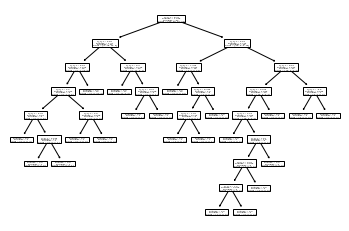

             [12.1, 19.1] [4.61, 6.14) [6.14, 9.54) [9.54, 12.1)
[12.1, 19.1]            6            3            0            1
[4.61, 6.14)            0            7            0            0
[6.14, 9.54)            1            3            7            0
[9.54, 12.1)            1            0            2            5
Accuracy Score: 0.6944444444444444


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_stag, y_stag, test_frac = 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_stag).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.07266666666666725, 'UnemploymentRate': 0.33680555555555475, 'InflationRate': 0.23780555555555574, 'CorePCE': -0.010166666666666704}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [ 0.07294444  0.33863889  0.23797222 -0.00938889]
Standard Deviation of Feature Importance: [0.03381737 0.07425826 0.06938615 0.01313968]


Reagan/Bush Era

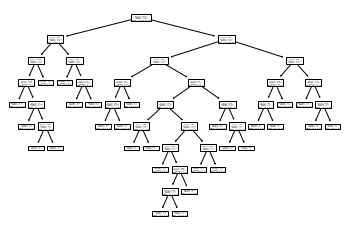

                [2.92, 6.415) [6.415, 7.945) [7.945, 8.7625) [8.7625, 11.64]
[2.92, 6.415)               9              3               0               0
[6.415, 7.945)              0              6               5               1
[7.945, 8.7625)             0              2               2               0
[8.7625, 11.64]             0              0               2               6
Accuracy Score: 0.6388888888888888


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_reagan, y_reagan, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_reagan).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': -0.0073611111111111065, 'UnemploymentRate': 0.16638888888888917, 'InflationRate': 0.058361111111111766, 'CorePCE': 0.25086111111111137}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [-0.00652778  0.17230556  0.05736111  0.25008333]
Standard Deviation of Feature Importance: [0.03193569 0.05973056 0.04165532 0.07190631]


Clinton Era

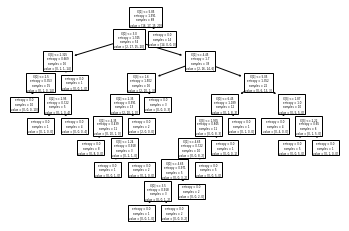

             [2.96, 4.74) [4.74, 5.31) [5.31, 5.56) [5.56, 6.54]
[2.96, 4.74)            7            0            0            0
[4.74, 5.31)            0            3            4            0
[5.31, 5.56)            0            3            3            2
[5.56, 6.54]            0            0            3            3
Accuracy Score: 0.5714285714285714


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_clint, y_clint, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_clint).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))

# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.01471428571428571, 'UnemploymentRate': 0.3048928571428568, 'InflationRate': 0.02735714285714268, 'CorePCE': -0.0012857142857143188}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [ 0.01617857  0.30167857  0.02721429 -0.00292857]
Standard Deviation of Feature Importance: [0.05646688 0.06863456 0.01520925 0.05531999]


War-on-Terror Era

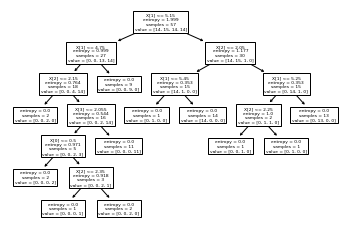

               [0.98, 1.4075) [1.4075, 2.71) [2.71, 4.7925) [4.7925, 5.98]
[0.98, 1.4075)              7              0              0              0
[1.4075, 2.71)              1              5              0              0
[2.71, 4.7925)              0              0              3              4
[4.7925, 5.98]              0              0              3              4
Accuracy Score: 0.7037037037037037


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_terror, y_terror, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_terror).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.02425925925925937, 'UnemploymentRate': 0.400851851851853, 'InflationRate': 0.16062962962963143, 'CorePCE': 0.032925925925925914}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [0.02466667 0.40018519 0.15737037 0.03366667]
Standard Deviation of Feature Importance: [0.01947331 0.07914993 0.08348545 0.02950713]


Recession Era

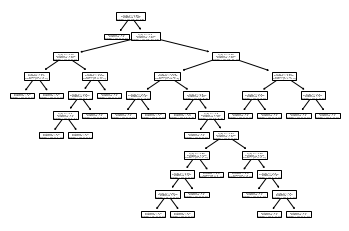

             [0.07, 0.09) [0.09, 0.14) [0.14, 0.18) [0.18, 3.94]
[0.07, 0.09)            1            2            0            0
[0.09, 0.14)            0            6            3            0
[0.14, 0.18)            0            1            5            1
[0.18, 3.94]            0            0            2            7
Accuracy Score: 0.6785714285714286


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_recess, y_recess, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_recess).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.1343928571428572, 'UnemploymentRate': 0.08603571428571415, 'InflationRate': 0.2950357142857139, 'CorePCE': 0.06774999999999967}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [0.13507143 0.08860714 0.29339286 0.06360714]
Standard Deviation of Feature Importance: [0.07371757 0.04204042 0.07622114 0.0582815 ]


Trump Era

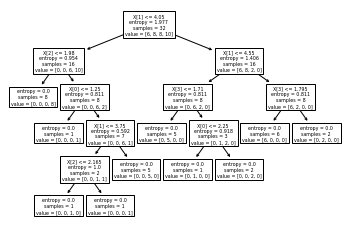

                            [0.34, 0.6225) [0.6225, 1.335)  \
[0.34, 0.6225)                           5               1   
[0.6225, 1.335)                          0               4   
[1.335, 1.9649999999999999)              0               0   
[1.9649999999999999, 2.45]               0               0   

                            [1.335, 1.9649999999999999)  \
[0.34, 0.6225)                                        0   
[0.6225, 1.335)                                       0   
[1.335, 1.9649999999999999)                           1   
[1.9649999999999999, 2.45]                            1   

                            [1.9649999999999999, 2.45]  
[0.34, 0.6225)                                       0  
[0.6225, 1.335)                                      0  
[1.335, 1.9649999999999999)                          3  
[1.9649999999999999, 2.45]                           1  
Accuracy Score: 0.6875


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_trump, y_trump, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_trump).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.000875, 'UnemploymentRate': 0.4446875, 'InflationRate': -0.0740625, 'CorePCE': 0.0643125}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [ 0.0010625  0.4468125 -0.0730625  0.05925  ]
Standard Deviation of Feature Importance: [0.03129441 0.09598989 0.05647313 0.05766606]


Covid/Post-Covid Era

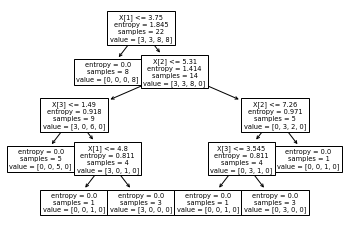

             [0.05, 0.07) [0.07, 0.08) [0.08, 0.33) [0.33, 3.08]
[0.05, 0.07)            2            1            1            0
[0.07, 0.08)            1            1            1            0
[0.08, 0.33)            0            0            3            0
[0.33, 3.08]            0            0            0            2
Accuracy Score: 0.6666666666666666


In [ ]:
# Getting training and testing data
np.random.seed(17)
X_train, y_train, X_test, y_test = train_test_splits(X_covid, y_covid, 0.3)

# Training
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, ccp_alpha = 0.005, random_state = 17, min_impurity_decrease=0.000001).fit(X_train, y_train)
plot_tree(tree)
plt.show()

# Testing
preds = tree.predict(X_test)
truths = y_test


# Evaluation
labels = list(pd.Series(pd.Series(groups_covid).unique()).sort_values())

new_labels = []
for klass in labels:
  if klass in list(y_train):
    new_labels.append(klass)

print(lab_conf_matrix(truths, preds, new_labels))


# Accuracy
print("Accuracy Score: " + str(accuracy_score(truths, preds)))

In [ ]:
# Feature Importance (Lab Implementation)
np.random.seed(17)
print(feat_importance(tree, X_train, X_test, y_test, preds))

{'RealGDP ': 0.0, 'UnemploymentRate': 0.2659166666666668, 'InflationRate': 0.15225000000000016, 'CorePCE': 0.15933333333333322}


In [ ]:
# Feature Importance (Sklearn Implementation)
np.random.seed(17)
perm_importances = permutation_importance(tree, X_test, y_test, scoring = "accuracy", n_repeats = 1000, random_state = 17)
print("Average Feature Importance: " + str(perm_importances["importances_mean"]))
print("Standard Deviation of Feature Importance: " + str(perm_importances["importances_std"]))

Average Feature Importance: [0.         0.26108333 0.15491667 0.1635    ]
Standard Deviation of Feature Importance: [0.         0.09080317 0.07251049 0.09791422]


The overall model places great importance on all four economic features. Specifically, the order of priority is CorePCE, InflationRate, Unemployment Rate, and RealGDP. All but RealGDP appear to be extremely important features, losing at least 25 percentage points of accuracy when one of these features get their values shuffled.


The Stagflation era model places great importance on unemployment rate and inflation rate, but it places little to no importance on the other features. This is consistent with what we know about the era, where the odd interaction between inflation and unemployment was heavily scrutenized.

The Reagan era model places great importance on core PCE and unemployment rate, but it places little to no importance on the other features. This neither confirms nor contradicts our generally-understood ideas about the era.

The Clinton era model places great importance on unemployment rate, but it places little to no importance on the other features. This is extremely fascinating, since it implies that the Clinton administration was almost exclusively focused on the USA's unemployment rate when setting their federal interest rates.

The War-on-Terror era model places immense importance on umemployment rate, moderate importance on inflation rate, and little importance on the other features. This suggests that the Bush Jr. administration was somewhat similar to the stagflation era in its focus when setting federal interest rates.

The Recession era model places great importance on inflation rate, moderate importance on real GDP, some importance on unemployment rate, and little importance on Core PCE. This, along with the relatively high standard deviations that these features have, suggests that the Obama administration may have taken a unique approach when setting their federal interest rates, relying on a mix of many economic features.

The Trump era model places immense importance on Unemployment Rate, little importance on CorePCE, and no importance on RealGDP and InflationRate. This suggests that the Trump administration mostly based its federal interest rate decisions on unemployment rate, being consistent with Mr. Trump's rhetoric about helping Americans obtain jobs.

The Covid/Post-Covid era model places great importance on Unemployment Rate, moderate importance on inflation rate and core PCE, and no importance on real GDP (being exactly 0). It should be noted that this era only has twelve months of data due to its recency, but predictions are relatively accurate (achieving 66% testing accuracy when random guessing would only achieve roughly 25% to 35%). The pandemic is known to have had a severe, negative impact on unemployment, so it is understandable why federal interest rate decisions might be heavily-influenced by it. Similarly, inflation rate and core PCE can be associated with quality of life, so it is reasonable why these are also important features. The relatively high standard deviations that these features have supports the possibility that they were, overall, strongly considered by the government. By contrast, real GDP has a less direct impact on people's lives than the other features, so it is understandable why the government might neglect it in favor of those other features. Additionally, because of Federeal Reserve dual mandate and recent unprecedented acceleration in the rate of inflation, the Federal Reserve has been keyed in on NFP and employement reports to allow them to aggresively raise the EFFR without causing a severe recession (Stagflation implications) because of the currently tight labor market. 


As a general trend over time (from 1973 to 2022), interest rates go from being primarily 7.1% to 19.1% (from 1973 through 1992), to being primarily 5% to 7.1% (from 1993 to 2000), to being primarily 1.2% to 5% (from 2001 through 2007), to being primarily 0% to 1.2% (from 2008 through 2022). They generally decrease over time. Interestingly, the changes in the "majority" interest rate range correspond with changes in the president's political party (although, this may be a coincidence). It is also worth noting that accuracies are consistently around 55% to 70% for the decision trees fit to these time period datasets, which may be lower than the original dataset due to smaller sample sizes and lack of dedicated hyperparameter tuning.

Visualizing Changes in Average EFFR Overtime

In [ ]:
# Getting Year Labels
  # (Assumes "YearMonth" Data Format, where year is 4 digits long)
years = []
for i in fin_df.index:
  y = i[:4]
  if y not in years:
    years.append(y)
years = np.array(years)
print(years)

['1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982'
 '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992'
 '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']


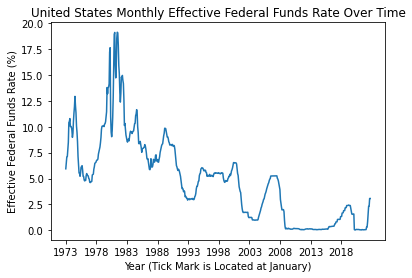

In [ ]:
# Producing plot of EFFR over time
plt.plot(fin_df.index, fin_df["EffectiveFederalFundsRate"])
plt.xticks(ticks=np.arange(0, len(fin_df), step=12*5), labels=years[0:len(years):5])
plt.title("United States Monthly Effective Federal Funds Rate Over Time")
plt.xlabel("Year (Tick Mark is Located at January)")
plt.ylabel("Effective Federal Funds Rate (%)")
plt.show()